# Importing Libraries

In [168]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Data Analysis

In [169]:
df_train = pd.read_csv('problem_2_train.csv')

In [170]:
len(df_train.mobmake.unique())

38

In [171]:
df_train.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [172]:
df_train.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

# Checking for null values

In [173]:
df_train.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

# There are no null values

# Converting string dates to datetime object

In [174]:
df_train.mobilepurchasedate = pd.to_datetime(df_train.mobilepurchasedate)
df_train.claimintdate = pd.to_datetime(df_train.claimintdate)
df_train.memcreateddate = pd.to_datetime(df_train.memcreateddate)
df_train.pickupStartdate = pd.to_datetime(df_train.pickupStartdate)

# Converting categorical data to numeric values

In [175]:
df_train['mobmake'] = pd.factorize(df_train.mobmake)[0]
df_train['custpincodecategory'] = pd.factorize(df_train.custpincodecategory)[0]
df_train['claimtype'] = pd.factorize(df_train.claimtype)[0]

# Data Visualisation

In [176]:
# Correlation
corr = X.corr()

In [177]:
corr

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid
mobmake,1.000000,-0.375028,-0.008644,-0.020999,0.065068,-0.020595,0.001947,-0.014083,-0.349695
hubid,-0.375028,1.000000,0.033957,-0.001304,-0.151538,0.088672,-0.003411,-0.022918,0.451190
pickuppartnerid,-0.008644,0.033957,1.000000,0.243320,0.088534,-0.236743,-0.032520,-0.053867,0.039964
deliverypartnerid,-0.020999,-0.001304,0.243320,1.000000,0.020992,-0.091999,-0.063766,-0.029602,0.018962
insuranceCompanyId,0.065068,-0.151538,0.088534,0.020992,1.000000,-0.081228,0.044086,-0.094457,-0.139533
custpincodecategory,-0.020595,0.088672,-0.236743,-0.091999,-0.081228,1.000000,-0.008758,0.111305,0.058971
claimtype,0.001947,-0.003411,-0.032520,-0.063766,0.044086,-0.008758,1.000000,0.009147,-0.004271
custpincode,-0.014083,-0.022918,-0.053867,-0.029602,-0.094457,0.111305,0.009147,1.000000,0.207607
servicecntrid,-0.349695,0.451190,0.039964,0.018962,-0.139533,0.058971,-0.004271,0.207607,1.000000


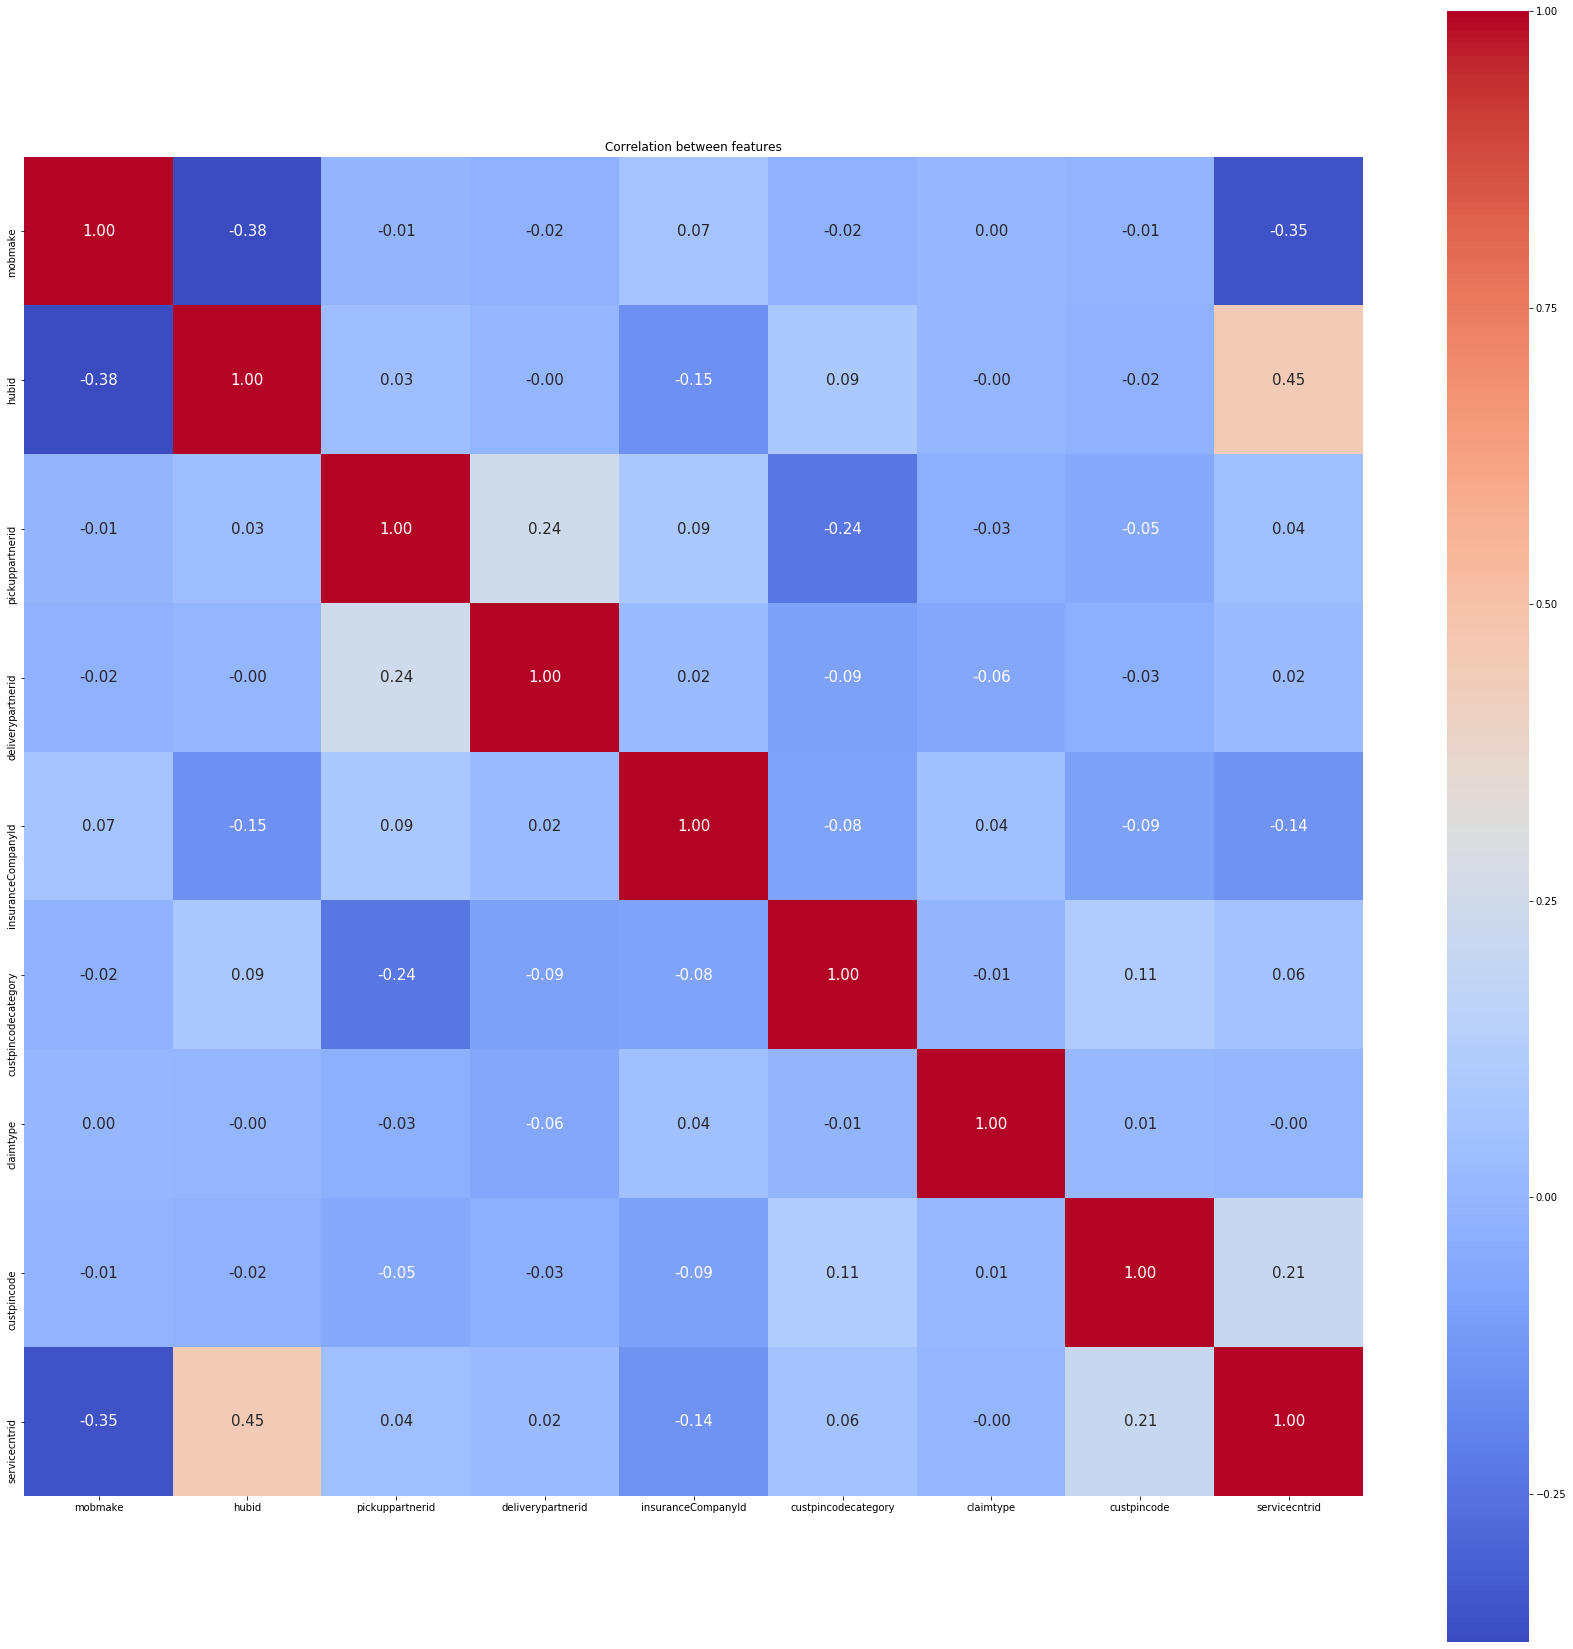

In [178]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

# The hubpincode and custpincode are highly correlated so we can drop one of these, we are dropping hubpincode

# Dropping all the dates columns as there is no relation between the dates

In [179]:
X = df_train.drop(['memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'pickupStartdate', 'hubpincode', 'tat_in_days'], axis = 1)

In [180]:
y = df_train['tat_in_days']

# Machine Learning

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
y_pred = linreg.predict(X_test)

In [185]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.765281828460094


# Gradient Boost

In [186]:
from sklearn.ensemble import GradientBoostingRegressor

In [187]:
gbreg = GradientBoostingRegressor(n_estimators=500)
gbreg.fit(X_train, y_train)
y_pred = gbreg.predict(X_test)

In [188]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.419407482463802


# Ridge

In [189]:
from sklearn.linear_model import Ridge

In [190]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) 
y_pred = ridge.predict(X_test)

In [191]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.7628323684184934


# Lasso

In [192]:
from sklearn.linear_model import Lasso

In [193]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)

In [194]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.938909784803139


# KNN

In [195]:
from sklearn.neighbors import KNeighborsRegressor

In [196]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

In [197]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.689348119227109


In [198]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso','Gradient Boost','KNN Regressor'],
    'Training RMSE': [ np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, ridge.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, lasso.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, gbreg.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_train, neigh.predict(X_train)))],
    'Test RMSE': [ np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, gbreg.predict(X_test))), np.sqrt(metrics.mean_squared_error(y_test, neigh.predict(X_test)))]
    })
models.sort_values(by='Test RMSE')

,Model,Training RMSE,Test RMSE
3,Gradient Boost,3.260525,4.419407
1,Ridge,4.483253,4.762832
0,Linear Regression,4.481894,4.765282
2,Lasso,4.642981,4.938910
4,KNN Regressor,3.088215,5.689348


# Loading the test data

In [199]:
df_test = pd.read_csv('problem_2_test.csv')

In [200]:
df_test.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [201]:
df_test['mobmake'] = pd.factorize(df_test.mobmake)[0]
df_test['custpincodecategory'] = pd.factorize(df_test.custpincodecategory)[0]
df_test['claimtype'] = pd.factorize(df_test.claimtype)[0]

In [202]:
X_test = df_test.drop(['memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'hubpincode', 'pickupStartdate'], axis = 1)

In [203]:
len(X_test.columns)

10

In [204]:
gbreg = GradientBoostingRegressor(n_estimators=500)
gbreg.fit(X, y)
y_pred = pd.DataFrame(gbreg.predict(X_test))

In [205]:
y_pred.to_csv('test_data_answers.csv', index=False, header=['tat_in_days'])

In [206]:
df_test['Dataset'] = y_pred
df_test.to_csv('test_data with answers.csv')